In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import FloatSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13

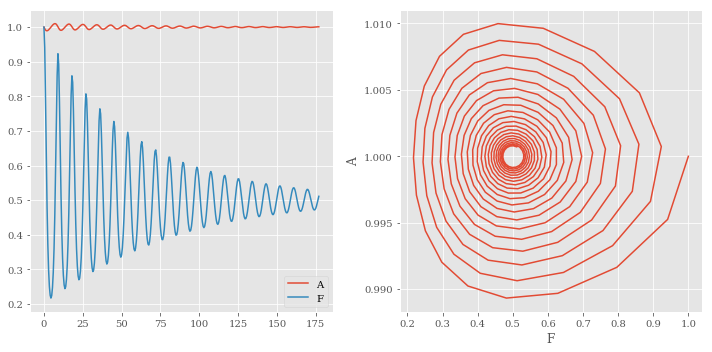

<function __main__.fiddle(r, p, A0=1, F0=1, TS=0.1, ND=100, **kwargs)>

In [2]:
def fiddle(r, p, A0=1, F0=1, TS = 0.1, ND = 100, **kwargs):
    def diff_eqs(INP, t):
        Y = np.zeros(2)
        V = INP
        Y[0] = r - p * V[0] * (V[1]+1) #Apika = r - pA(F+1)
        Y[1] = V[1]/p *(V[0]-1)    #    Fpika = F/p (A-1)
        return Y

 #   r = 1
#    p = 1
#    A0 = 1
#    F0 = 1
#    ND = 100
#    TS = 0.1
    INPUT = np.array([A0, F0])
    t_start = 0
    t_end = ND
    t_inc = TS

    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT, t_range)
    
    plt.figure(figsize=(10, 5))
    plt.suptitle("""""")
    plt.subplot(121)    
    plt.plot(t_range, RES[:,0], label="A")
    plt.plot(t_range, RES[:,1], label="F")
    #plt.ylim((-0.1,5))
    plt.legend()
    #plt.title(r"""r: {}, p: {}""".format(r, p))
    
    plt.subplot(122)
    plt.plot(RES[:,1], RES[:,0])
    plt.xlabel("F")
    plt.ylabel("A")
    plt.tight_layout(h_pad=1.1)
    
    

    if "shrani" in kwargs:
        if kwargs["shrani"]:
            plt.savefig("prvidel-r:{}-p:{}.pdf".format(r,p))
            plt.savefig("prvidel-r:{}-p:{}.jpg".format(r,p))
    plt.show()
interact(fiddle, 
        r=FloatSlider(min=0.01, max=10, step=0.01, value=0.03),
        p=FloatSlider(min=0.01, max=1, step=0.01, value=0.02),
         ND = FloatSlider(min=1, max=1000, step=1, value=177, description="Čas"),
         TS = FloatSlider(min=0.01, max=4, step=0.02, value=0.5, description="Korak"),
         A0 = FloatSlider(min=0.1, max=2, step=0.1, value=1),
         F0 = FloatSlider(min=0.1, max=2, step=0.1, value=1),
         
        shrani=False
        )

In [3]:
def fiddle2(r, p=.05, A0=1, F0=1, TS = 0.001, ND = 1000, **kwargs):
    def diff_eqs(INP, t):
        Y = np.zeros(2)
        V = INP
        Y[0] = r - p * V[0] * (V[1]+1) #Apika = r - pA(F+1)
        Y[1] = V[1]/p *(V[0]-1)    #    Fpika = F/p (A-1)
        return Y
    INPUT = np.array([A0, F0])
    t_start = 0
    t_end = ND
    t_inc = TS

    t_range = np.arange(t_start, t_end+t_inc, t_inc)
    RES = odeint(diff_eqs,INPUT, t_range)
    return RES

In [5]:
def ravnovesno_stanje(Q):
    RES = fiddle2(Q)
    A = RES[-50:,0]
    F = RES[-50:,1]
    if A.mean()-A[-1] > 1e-6:
        A = np.nan
    if F.mean()-F[-1] > 1e-6:
        F = np.nan
    return A[-1],F[-1]
ravnovesno_stanje(0.11)

(0.9999999657873861, 1.1999997576904655)

In [31]:
N = 1000
Qji = np.linspace(0,0.3,N)
Aji = np.empty(N)
Fji = np.empty(N)

for n in range(N):
    print(f"N: {n}", end="\r")
    Aji[n],Fji[n] = ravnovesno_stanje(Qji[n])

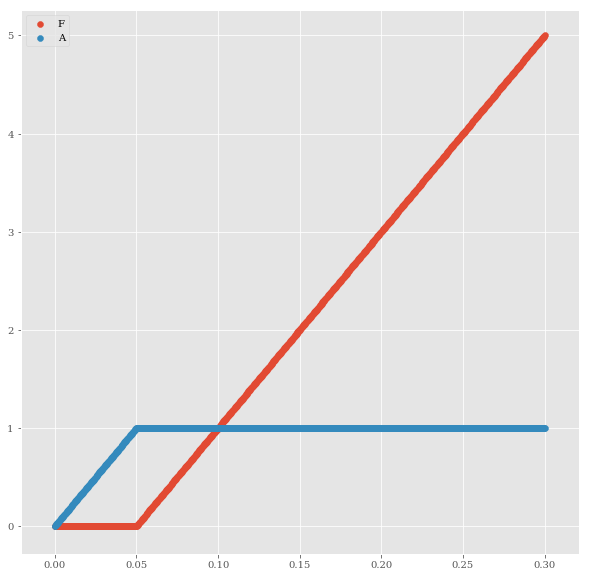

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(Qji, Fji, label="F")
plt.scatter(Qji, Aji, label="A")
plt.legend()
plt.savefig("2-1-vplivQnastacstanje.pdf")
plt.savefig("2-1-vplivQnastacstanje.jpg")
plt.show()

# Fitanje:

In [8]:
from scipy.optimize import curve_fit

def fitaj(Q):
    def funk(x, omega, tau, theta, y0, A):
        return y0 + A*np.cos(omega*x+theta)*np.exp(-x/tau)
    def fiddle2(r, razpon, p=.05, A0=1, F0=1, **kwargs):
        def diff_eqs(INP, t):
            Y = np.zeros(2)
            V = INP
            Y[0] = r - p * V[0] * (V[1]+1) #Apika = r - pA(F+1)
            Y[1] = V[1]/p *(V[0]-1)    #    Fpika = F/p (A-1)
            return Y
        INPUT = np.array([A0, F0])
        t_range = razpon
        RES = odeint(diff_eqs,INPUT, t_range)
        return RES    
    
    razpon = np.linspace(0, 20/Q, 10000*Q)
    y = fiddle2(Q, razpon)[:,1]
    
    popt,bla = curve_fit(funk, razpon, y, #p0=[0.8, 25, -0.04, 0.6, 0.33] )
                        )
    return popt

fitaj(0.06)

/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


array([ 0.41605186, 29.5821034 , -0.08109564,  0.20019332,  0.41940498])

In [ ]:
N = 200
Qji = np.concatenate((np.linspace(0.001, 0.05, 10), np.linspace(0.05, 0.06, 90), np.linspace(0.06, 6, N-100)))
omege2= np.empty_like(Qji)
taui2 = np.empty_like(Qji)

for i, Q in enumerate(Qji):
    print(f"N = {i}")
    try:
        omege2[i], taui2[i], *bla = fitaj(Q)
        pass
    except RuntimeError:
        omege2[i], taui2[i] = np.nan, np.nan

N = 0
N = 1
N = 2
N = 3
N = 4
N = 5


/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


N = 6
N = 7
N = 8
N = 9
N = 10
N = 11
N = 12
N = 13
N = 14
N = 15
N = 16
N = 17
N = 18
N = 19
N = 20
N = 21
N = 22
N = 23
N = 24
N = 25
N = 26
N = 27
N = 28
N = 29
N = 30
N = 31
N = 32
N = 33
N = 34
N = 35
N = 36
N = 37
N = 38
N = 39
N = 40
N = 41
N = 42
N = 43
N = 44
N = 45
N = 46
N = 47
N = 48
N = 49
N = 50
N = 51


/home/peter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """


N = 52
N = 53
N = 54
N = 55
N = 56
N = 57
N = 58
N = 59
N = 60
N = 61
N = 62
N = 63
N = 64
N = 65
N = 66
N = 67
N = 68
N = 69
N = 70
N = 71
N = 72
N = 73
N = 74
N = 75
N = 76
N = 77
N = 78
N = 79
N = 80
N = 81
N = 82
N = 83
N = 84
N = 85
N = 86
N = 87
N = 88
N = 89
N = 90
N = 91
N = 92
N = 93
N = 94
N = 95
N = 96
N = 97
N = 98
N = 99
N = 100
N = 101
N = 102
N = 103
N = 104
N = 105
N = 106
N = 107
N = 108
N = 109
N = 110
N = 111
N = 112
N = 113
N = 114
N = 115
N = 116
N = 117
N = 118
N = 119
N = 120
N = 121
N = 122
N = 123
N = 124
N = 125
N = 126
N = 127
N = 128
N = 129
N = 130
N = 131
N = 132
N = 133
N = 134
N = 135
N = 136
N = 137
N = 138
N = 139
N = 140
N = 141
N = 142
N = 143
N = 144
N = 145
N = 146
N = 147
N = 148
N = 149
N = 150
N = 151
N = 152
N = 153
N = 154
N = 155
N = 156
N = 157
N = 158
N = 159
N = 160
N = 161
N = 162
N = 163
N = 164
N = 165
N = 166
N = 167
N = 168
N = 169
N = 170
N = 171
N = 172
N = 173
N = 174
N = 175
N = 176
N = 177
N = 178
N = 179
N = 180
N = 181
N = 182


In [ ]:
#Qji = np.linspace(0.01, 1, 1000)
fig, [ax1, ax2] = plt.subplots(1,2, sharex=True, figsize=(10,5))

ax1.plot(Qji, np.abs(omege2))
ax1.set_xlabel("Parameter Q")
ax1.set_ylabel(r"Krožna frekvenca $\omega$")
ax1.set_xlim((0.04, 0.522))

ax2.plot(Qji, taui2)
ax2.set_xlabel("Parameter Q")
ax2.set_ylabel(r"Atenuacija $\tau$")

#fig.savefig("2-2-omega_tau2.pdf")
#fig.savefig("2-2-omega_tau2.jpg")